# Pandas biblioteka

**Pandas** je Python biblioteka namenjena radu sa podacima. Raspolaže funkcijama za kreiranje struktura podataka, učitavanje različitih datoteka, kao i mnogobrojnim funkcijama za manipulaciju nad podacima. Na [ovom](https://pandas.pydata.org/) linku se nalazi zvanična stranica biblioteke, a [ovde](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) se može pronaći koristan tutorijal.

In [1]:
import pandas as pd
import numpy as np

Dve osnovne strukture kojima raspolaže Pandas biblioteka su **Series** i **DataFrame**.

**Series** su strukture podataka koje odgovaraju jednodimenzionalnim nizovima sa pridruženim obeležjima (takozvanim indeksima).

Serija koja sadrži brojeve 2, 3, 5, 7 i 12 se može kreirati na sledeći način:

In [2]:
s = pd.Series([2, 3, 5, 7, 12])

In [3]:
s

0     2
1     3
2     5
3     7
4    12
dtype: int64

Elementi serije se mogu dobiti preko atributa `values`:

In [4]:
print('Svi elementi:', s.values)

Svi elementi: [ 2  3  5  7 12]


Indeksi serije se mogu dobiti preko atributa `index`:

In [5]:
print('Svi indeksi:', s.index)

Svi indeksi: RangeIndex(start=0, stop=5, step=1)


Podrazumevano, indeksi su numeričke vrednosti sa korakom 1 počevši od vrednosti 0. Prilikom kreiranja serije indeksi se mogu eksplicitno zadati parametrom `index`:

In [6]:
s = pd.Series([2, 3, 5, 7, 12], index=['a', 'b', 'c', 'd', 'e'])

In [7]:
s

a     2
b     3
c     5
d     7
e    12
dtype: int64

Pristup elementima serije je moguć na osnovu pridruženih indeksa.

In [8]:
print('Element sa indeksom "b":', s['b'])
print('Element sa indeksom "c":', s['c'])

Element sa indeksom "b": 3
Element sa indeksom "c": 5


**DataFrame** su strukture podataka koje odgovaraju tabelarnim podacima sa pridruženim obeležjima. Kolone ovih struktura predstavljaju *Series* strukture. 

*DataFrame* struktura koja sadrži serije (kažemo i kolone) `ime`, `godine` i `grad` se može kreirati na sledeći način: 

In [9]:
df = pd.DataFrame({
    'ime': ['Ana', 'Laza', 'Maja', 'Goran'],
    'godine': [20, 22, 30, 27],
    'grad': ['BG', 'NS', 'NS', 'NI']
})

Dimenzije strukture se mogu dobiti pomoću atributa `shape`:

In [10]:
df.shape

(4, 3)

Ispis cele strukture se može postići navođenjem imena strukture:

In [11]:
df

,ime,godine,grad
0,Ana,20,BG
1,Laza,22,NS
2,Maja,30,NS
3,Goran,27,NI


U praksi su skupovi podataka obično većih dimenzija pa se često ispisuje nekoliko prvih vrsta ili nekoliko poslednjih vrsta. Za to se koriste funkcije `head` i `tail`.

Ispis prve tri vrste:

In [12]:
df.head(3)

,ime,godine,grad
0,Ana,20,BG
1,Laza,22,NS
2,Maja,30,NS


Ispis poslednje tri vrste:

In [13]:
df.tail(3)

,ime,godine,grad
1,Laza,22,NS
2,Maja,30,NS
3,Goran,27,NI


Baš kao i kod serija, i kod struktura tipa DataFrame se mogu očitati indeksi. Razlikujemo indekse vrsta i indekse kolona: 

In [14]:
print('Indeksi vrsta:', df.index)
print('Indeksi kolona:', df.columns)

Indeksi vrsta: RangeIndex(start=0, stop=4, step=1)
Indeksi kolona: Index(['ime', 'godine', 'grad'], dtype='object')


Vrednosti pojedinačnih kolona (serija) možemo pročitati na više načina.

I način: korišćenje imena kolone i tačka notacije

In [15]:
print('Imena:')
df.ime

Imena:


0      Ana
1     Laza
2     Maja
3    Goran
Name: ime, dtype: object

II način: korišćenje imena kolone i uglastih zagrada

In [16]:
print('Imena:')
df['ime']

Imena:


0      Ana
1     Laza
2     Maja
3    Goran
Name: ime, dtype: object

Drugi način nudi nešto više pogodnosti zbog imena kolona koja mogu sadržati beline, kao i zbog čitanja većeg broja kolona istovremeno.

In [17]:
df[['ime', 'godine']]

,ime,godine
0,Ana,20
1,Laza,22
2,Maja,30
3,Goran,27


Pristup pojedinačnim vrstama je moguć preko funkcija `loc` i `iloc`. Funkcija `loc` je prediđena za čitanje vrsta navođenjem indeksa vrsta u formi imena, a funkcija `iloc` za čitanje vrsta navođenjem numeričkih indeksa. Ovo pravilo nije obavezujuće ali se u praksi poštuje.

Tako se druga vrsta može izdvojiti sledećim fragmentom koda:

In [18]:
df.iloc[2]

ime       Maja
godine      30
grad        NS
Name: 2, dtype: object

Rezultat poziva funkcije `loc` je tipa serije.

In [19]:
type(df.iloc[2])

pandas.core.series.Series

Moguće je pročitati i veći broj vrsta navođenjem operatora isecanja. Tako se prva, druga i treća vrsta mogu pročitati sledećim fragmentom koda:

In [20]:
df.iloc[1:3]

,ime,godine,grad
1,Laza,22,NS
2,Maja,30,NS


Čitanje vrednosti koje su u preseku željene vrste i kolone moguće je korišćenjem funkcija `iloc` i `at`:

In [21]:
df.iloc[2]['ime']

'Maja'

In [22]:
df.at[2, 'ime']

'Maja'

Oba poziva kombinuju indeks vrste i ime kolone.

Pandas dozvoljava da se u kombinaciji sa `numpy` bibliotekom mogu izračunavati razne zanimljive statistike skupa podataka. Potrebne konverzije serija u višedimenzione nizove se izvršavaju automatski.

Na primer, prosek godina osoba sadržanih u skupu se može dobiti sa:

In [23]:
np.average(df['godine'])

24.75

Na primer, ime najstarije osobe se može dobiti na sledeći način:

In [24]:
najveci_broj_godina = np.max(df['godine'])
indeks_najstarije_osobe = np.argmax(df['godine'])
ime_najstarije_osobe = df.loc[indeks_najstarije_osobe]['ime']

print(ime_najstarije_osobe, najveci_broj_godina)

Maja 30


Kreirani skupovi podataka se mogu proširivati.

Na primer, dodavanje nove kolone sa imenom `fakultet` se može realizovati na sledeći način: 

In [25]:
df['fakultet'] = pd.Series(['Matf', 'TF', 'TF'])

S obrizom da smo naveli samo tri vrednosti za skup koji sadrži četiri vrste, u poslednjoj vrsti će biti upisana nedostajuća (NaN) vrednost. 

In [26]:
df

,ime,godine,grad,fakultet
0,Ana,20,BG,Matf
1,Laza,22,NS,TF
2,Maja,30,NS,TF
3,Goran,27,NI,NaN


Za eksplicitno zadavanje nedostajuće vrednosti može se koristiti `numpy` konstanta `np.nan` ili `Python` vrednost `None`. U ovom smislu bi kod `df['fakultet'] = pd.Series(['Matf', 'TF', 'TF', np.nan])` bio ekvivalentan prethodnom bloku koda.

S obzirom da izraz `np.nan == np.nan` ima vrednost `False`, za proveru da li je neka vrednost nedostajuća ili ne koristi se funkcija `isna`.

In [27]:
df['fakultet'].isna()

0    False
1    False
2    False
3     True
Name: fakultet, dtype: bool

Moguće je dodavati i nove vrste strukturama podataka: 

In [28]:
df.loc[5] = pd.Series(['Milan', 24, 'NS', 'TF'], index =['ime', 'godine', 'grad', 'fakultet'])

In [29]:
df

,ime,godine,grad,fakultet
0,Ana,20,BG,Matf
1,Laza,22,NS,TF
2,Maja,30,NS,TF
3,Goran,27,NI,NaN
5,Milan,24,NS,TF


Dalje ćemo videti kako možemo učitati podatke koji se nalaze u datoteci tipa CSV i izvršiti neke manipulacije nad njima.

U datoteci `points.csv` se nalaze informacije o tačkama. Svaka tačka opisana je kolonama `ime` (veliko slovo engleske abecede), `x` i `y` koje predstavljaju koordinate tačke (celi brojevi između 0 i 49) i bojom tačke `color`. Boja tačke može biti crvena, žuta ili plava, ili može imati nedostajuću vrednost.

Prvo ćemo učitati CSV fajl i prikazati njegov sadržaj. Za učitavanje sadržaja CSV datoteke može se koristiti funkcija `read_csv`. Ona kao argument očekuje putanju do fajla, a mogu se po potrebi navesti i separator, kodna šema sadržaja, nova imena kolona i slično. Uz ovu, biblioteka Pandas nudi i mnoge druge funkcije za čitanje JSON formata, Excel formata, HTML formata i mnogih drugih. 

In [30]:
points = pd.read_csv('data/points.csv')

In [31]:
points

,Point,x,y,Color
0,A,37,34,red
1,B,1,12,NaN
2,C,6,37,NaN
3,D,32,11,yellow
4,E,8,30,yellow
5,F,19,10,NaN
6,G,21,44,yellow
7,H,21,43,NaN
8,I,2,5,yellow
9,J,14,33,red


Možemo videti da datoteka sadrži ukupno 26 unosa.

In [32]:
print('CSV fajl sadrzi', points.shape[0], 'unosa')

CSV fajl sadrzi 26 unosa


Brz uvid u strukturu podataka može se dobiti pozivom funkcije `info`:  ona prikazuje tip za svaki atribut i broj vrednosti na osnovu kojeg se može uvideti da li u skupu ima nedostajućih vrednosti.

In [33]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Point   26 non-null     object
 1   x       26 non-null     int64 
 2   y       26 non-null     int64 
 3   Color   18 non-null     object
dtypes: int64(2), object(2)
memory usage: 960.0+ bytes


Ako želimo da obrišemo nedostajuće vrednosti, možemo koristiti funkciju `dropna`. Njenim atributom `axis` se utiče na brisanje duž vrste `(axis = 0)` ili kolone `(axis = 1)`, dok se atributom `how` utiče na način brisanja - vrednost `any` ukazuje da treba obrisati vrstu ili kolonu ukoliko ima bar jednu nedostajuću vrednost, dok vrednost `all` ukazuje da treba obrisati vrstu ili kolonu ukoliko su sve vrednosti nedostajuće. Pozdrazumevane vrednosti navedenih atributa su 0 i `any`. 

In [34]:
points = points.dropna(axis = 0, how = 'any')

In [35]:
points.shape

(18, 4)

Nad kolonama podataka moguće je izvršavati mnoge relacione i logičke operacije.

Izraz kojim možemo izdvojiti tačke kod kojih je `x` koordinata manja od 30 je:

In [36]:
points[points['x'] < 30]

,Point,x,y,Color
4,E,8,30,yellow
6,G,21,44,yellow
8,I,2,5,yellow
9,J,14,33,red
10,K,1,31,red
11,L,13,25,blue
13,N,11,16,blue
16,Q,1,41,red
18,S,2,37,red
23,X,16,2,red


Tačke koje su žute boje se mogu dobiti sledećim izrazom: 

In [37]:
points[points['Color'] == 'yellow']

,Point,x,y,Color
3,D,32,11,yellow
4,E,8,30,yellow
6,G,21,44,yellow
8,I,2,5,yellow
17,R,45,49,yellow


Izraz kojim možemo spojiti prethodna dva uslova tj. izdvojiti tačke kod kojih je `x` koordinata manja od `30` i koje su žute boje je: 

In [38]:
points[(points['x'] < 30) & (points['Color'] == 'yellow')]

,Point,x,y,Color
4,E,8,30,yellow
6,G,21,44,yellow
8,I,2,5,yellow


Korišćenje zagradica u izrazu koji koristi logičko i (operator &) je neophodno zbog prioriteta operatora.

Prethodni uslov se može čitkije zapisati sa:

In [39]:
x_less_30 = points['x'] < 30
collor_yellow = points['Color'] == 'yellow'

points[x_less_30 & collor_yellow]

,Point,x,y,Color
4,E,8,30,yellow
6,G,21,44,yellow
8,I,2,5,yellow


U izrazima je moguće koristiti negacije. Na primer, izraz kojim se mogu izdvojiti tačke kod kojih je `x` koordinata manja od 30 i koje nisu žute boje je: 

In [40]:
points[x_less_30 & ~collor_yellow]

,Point,x,y,Color
9,J,14,33,red
10,K,1,31,red
11,L,13,25,blue
13,N,11,16,blue
16,Q,1,41,red
18,S,2,37,red
23,X,16,2,red


Dalje ćemo odrediti koliko ima tačaka koje su obojene određenom bojom korišćenjem funckije `value_counts`. Rezultat ćemo grafički pikazati pomoću pitice.

In [41]:
import matplotlib.pyplot as plt

In [42]:
p = points['Color'].value_counts()
print(p)

red       10
yellow     5
blue       3
Name: Color, dtype: int64


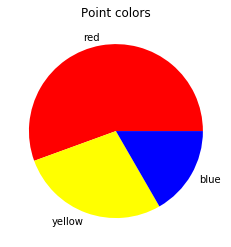

In [43]:
plt.title('Point colors')
plt.pie(p, labels=p.index, colors = p.index)
plt.show()

Izraz kojim se mogu izdvojiti tačke koje su crvene ili čije su obe koordinate manje od 10 je:

In [44]:
is_red = points['Color'] == 'red'
x_less_5 = points['x'] < 10
y_less_5 = points['y'] < 10
points[is_red | x_less_5 & y_less_5]

,Point,x,y,Color
0,A,37,34,red
8,I,2,5,yellow
9,J,14,33,red
10,K,1,31,red
14,O,43,28,red
16,Q,1,41,red
18,S,2,37,red
19,T,37,45,red
21,V,43,24,red
23,X,16,2,red


Vrednosti kolona je moguće promeniti. Tako, na primer, sve tačke duž x-ose možemo pomeriti za vrednost 5 sledećim kodom: 

In [45]:
points.loc[:, 'x'] = points['x'].apply(lambda v: v + 5)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Funkcija `apply` modifikuje vrednost `x` kolone izvršavanjem anonimne funkcije koja pročitanu vrednost uveća za 5. Ovako dobijena vrednost se dalje koriščenjem funkcije `at` čuva na nivou odgovarajuće vrste u koloni `x`.

I konačno, ovako dobijeni skup tačaka možemo sačuvati u novom CSV fajlu korišćenjem funkcije `to_csv` koja kao argument očekuje putanju rezultujuće datoteke.

In [46]:
points.to_csv('data/translated_points.csv')